# Amittai W

## Computational Comparative Literature

### Imports

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from pandas import DataFrame
pd.set_option('display.max_rows', 600)
from pathlib import Path  
import glob
from os import path
import numpy.random as random
from IPython.display import display, HTML

%pip install gensim
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [27]:
# stop words

class Colors:
  HEADER = '\033[95m'
  OKBLUE = '\033[94m'
  OKCYAN = '\033[96m'
  OKGREEN = '\033[92m'
  WARNING = '\033[93m'
  FAIL = '\033[91m'
  ENDC = '\033[0m'
  BOLD = '\033[1m'
  UNDERLINE = '\033[4m'

def load_stopwords():
  stopwords = []
  with open("../data/metadata/stopwords.txt") as f:
    for line in f:
      # print(line)
      stopwords.append(line.strip()) # .append(line.strip())
  return stopwords

stop_words = load_stopwords()

print(Colors.OKBLUE + "Hello, welcome to my project!" + Colors.ENDC)
print(f"{stop_words = }")

Hello, welcome to my project!
stop_words = ['a', 'able', 'about', 'above', 'abst', 'accordance', 'according', 'accordingly', 'across', 'act', 'actually', 'added', 'adj', 'affected', 'affecting', 'affects', 'after', 'afterwards', 'again', 'against', 'ah', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'announce', 'another', 'any', 'anybody', 'anyhow', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'anywhere', 'apparently', 'approximately', 'are', 'aren', 'arent', 'arise', 'around', 'as', 'aside', 'ask', 'asking', 'at', 'auth', 'available', 'away', 'awfully', 'b', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'begin', 'beginning', 'beginnings', 'begins', 'behind', 'being', 'believe', 'below', 'beside', 'besides', 'between', 'beyond', 'biol', 'both', 'brief', 'briefly', 'but', 'by', 'c', 'ca', 'came', 'can', 'cannot', "can't", 'cause', 'causes', 'certain', 'cert

In [28]:
# years to focus on
years = [str(yr) for yr in range(2000, 2023)]

# max count per year
max_count = 10

years, max_count

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(['2000',
  '2001',
  '2002',
  '2003',
  '2004',
  '2005',
  '2006',
  '2007',
  '2008',
  '2009',
  '2010',
  '2011',
  '2012',
  '2013',
  '2014',
  '2015',
  '2016',
  '2017',
  '2018',
  '2019',
  '2020',
  '2021',
  '2022'],
 10)

1.

In [29]:
# load $count files for each year.
directory_path = "../data/categorized"

def load_dictionary():
  # all_words = []
  dictionary = set()
  dictionary_file = "../data/metadata/dictionary"
  with open(dictionary_file) as f:
    for line in f:
      dictionary.add(line.strip().lower())
  return dictionary

def load_counts():
  with open("../data/metadata/counts.csv", "r") as counts_file:
    counts = pd.read_csv(counts_file)
  return counts

def load_words():
  """Load data (words) into a list of lists of words."""
  dictionary = load_dictionary()
  stop_words = load_stopwords()
  all_words = []
  for year in years:
    possible_files = [f for f in glob.glob(f"{directory_path}/{year}/*.txt") if path.exists(f)]
    num_files = min(max_count, len(possible_files))
    files = random.choice(possible_files, size=num_files, replace=True)
    words = []
    for file in files:
      with open(file) as f:
        for line in f:
          for word in line.strip().lower().split():
            if word in dictionary and word not in stop_words + ["old", "id"]:
              words.append(word)
    # pd = DataFrame([year, words], columns=["year", "words"])
    all_words.append(words)
  return all_words

all_words = load_words()
def load_words_str():
  """Load data (words) into a list of strings."""
  global all_words
  if "all_words" not in globals():
    all_words = load_words()
  return [" ".join(w) for w in all_words]

def load_data():
  """Load data (words0 into a dataframe)"""
  all_words = load_words_str()
  df = pd.DataFrame(all_words, columns = ["words"])
  df.insert(0, "year", years, allow_duplicates=False)
  return df

raw_data = load_data()
raw_data.head(100)


/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,words
0,2000,learn success tiny african country economic fo...
1,2001,technology technology second series big ray si...
2,2002,pentagon ai predict days future guide better p...
3,2003,ai better fusion spectrum place device best us...
4,2004,report humankind wired visit saved visit saved...
5,2005,understanding military ai guidance community p...
6,2006,view protein evolution nature genetics visitin...
7,2007,consciousness brain region consciousness brain...
8,2008,epic siberian journey solve mass extinction my...
9,2009,smart track health smart track health future s...


In [30]:
# load stopwords
stop_words = load_stopwords()
stop_words

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',
 'can',
 'ca

In [31]:
# initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(input='content', stop_words=load_stopwords(), strip_accents="ascii")
tfidf_vector = tfidf_vectorizer.fit_transform(raw_data["words"])


tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=[str(year) for year in years], columns=tfidf_vectorizer.get_feature_names_out())
# data.append(tfidf_df)
data = tfidf_df
data.loc["document"] = data.sum(axis=0)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:404: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['didn', 'doesn', 'don', 'hasn', 'haven', 'isn', 'keep', 'keeps', 'll', 'shouldn', 'sure', 've'] not in stop_words.
  warnings.warn(


In [32]:
# Re-organize so words are in rows rather than columns
cleaned_data = data.sort_index().stack().reset_index()
cleaned_data = cleaned_data.rename(columns={0:'tfidf', 'level_0': 'year','level_1': 'term', 'level_2': 'term'})
# stacked_tfidf_df.sample(n=20)
cleaned_data.sample(n=20)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,term,tfidf
170350,2013,foggy,0.000000
257401,2020,confidence,0.014446
182864,2014,fatality,0.000000
132300,2010,gabriel,0.000000
144598,2011,fatty,0.000000
187715,2014,racially,0.000000
24549,2001,truncated,0.000000
280866,2022,adversely,0.000000
89757,2007,ancillary,0.000000
191452,2015,ace,0.000000


In [33]:
# top 10 words for all stories
#! MemoryError: Unable to allocate 97.5 GiB for an array with shape (23351, 560214) and data type float64
top_tfidf = cleaned_data.groupby(['year', 'term'])['tfidf'].sum().sort_values(ascending=False).groupby('year')
top_tfidf.head(1000)
# top_tf_

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year      term     
document  data         2.125219
          people       1.317495
          protein      1.262238
          human        1.207703
          learning     1.168533
                         ...   
2010      utrecht      0.000000
          utterance    0.000000
          utterly      0.000000
          twenty       0.000000
          twelve       0.000000
Name: tfidf, Length: 24000, dtype: float64

In [35]:
# view the top words by year.

for year, data in top_tfidf:
  print(data.head(20))
  print("\n")


year  term    
2000  everett     0.709832
      ino         0.225069
      film        0.171884
      cyclops     0.164473
      pete        0.138694
      sheriff     0.112534
      penny       0.112534
      comic       0.107090
      dan         0.099046
      big         0.092344
      scene       0.088567
      men         0.088321
      hero        0.084142
      klan        0.077908
      homer       0.077908
      nelson      0.076565
      wife        0.076493
      poseidon    0.069252
      divine      0.069252
      george      0.068118
Name: tfidf, dtype: float64


year  term       
2001  course         0.472566
      phantom        0.311399
      chromatin      0.253591
      learning       0.235486
      assessment     0.190260
      teaching       0.176072
      reading        0.165334
      student        0.165334
      chromosome     0.161922
      nuclear        0.157136
      examination    0.145456
      computer       0.141485
      indicative     0.140450
      p

2.

In [37]:
# check for a single word
def check_word(df, word, count):
  """Check the occurrence of a word in a dataframe."""
  return df[df['term'] == word].sort_values("tfidf", ascending=False).head(count)


/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
check_word(cleaned_data, "ethics", 20)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,term,tfidf
297378,document,ethics,0.095975
131537,2010,ethics,0.040246
246350,2019,ethics,0.009974
233593,2018,ethics,0.007569
220836,2017,ethics,0.006056
259107,2020,ethics,0.005032
271864,2021,ethics,0.004998
195322,2015,ethics,0.004827
80509,2006,ethics,0.004089
169808,2013,ethics,0.003497


In [42]:
check_word(cleaned_data, "death", 20)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,year,term,tfidf
296239,document,death,0.118794
53856,2004,death,0.019964
257968,2020,death,0.019805
168669,2013,death,0.019056
104884,2008,death,0.017465
117641,2009,death,0.009454
2828,2000,death,0.008844
181426,2014,death,0.008715
92127,2007,death,0.007185
41099,2003,death,0.004684


## Latent Dirichlet Allocation (LDA)

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
/root/venv/lib/python3.9/site-packages/wordcloud/wordcloud.py:512: DeprecationWarning: ROTATE_90 is deprecated and will be

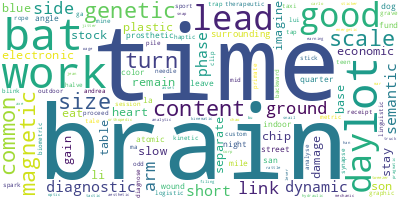

,year,term,tfidf
296211,document,data,2.125219
301681,document,people,1.317495
302364,document,protein,1.262238
298859,document,human,1.207703
299920,document,learning,1.168533
...,...,...,...
296231,document,deafness,0.001731
305364,document,underly,0.001731
293680,document,agnes,0.001731
305714,document,verbally,0.001731


In [43]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

sorted_words = cleaned_data[cleaned_data["year"] == "document"].sort_values("tfidf", ascending=False)
words = ",".join(sorted_words["term"].values)
# Generate a word cloud
wordcloud.generate(words)
# Visualize the word cloud
display(wordcloud.to_image())
sorted_words

In [44]:
import gensim.corpora as corpora

# ! re-use 'all_words' variable defined earlier.
# all_words = load_words()

id2word = corpora.Dictionary(all_words)

# Term Document Frequency
corpus = [id2word.doc2bow(year_data) for year_data in all_words]
# View
print(corpus[:1][0][:30])

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(0, 5), (1, 10), (2, 2), (3, 14), (4, 1), (5, 1), (6, 6), (7, 5), (8, 12), (9, 5), (10, 1), (11, 24), (12, 9), (13, 1), (14, 5), (15, 5), (16, 1), (17, 1), (18, 11), (19, 1), (20, 7), (21, 2), (22, 2), (23, 2), (24, 10), (25, 5), (26, 14), (27, 86), (28, 1), (29, 5)]


In [45]:
from pprint import pprint
# number of topics
print(corpus[:1][0][:30])
num_topics = 10
# Build LDA model
def build_lda():
  """Build LDA model."""
  lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics, random_state=100, chunksize=100, passes=2, workers=8)
  # Print the Keyword in the 10 topics
  pprint(lda_model.print_topics())
  doc_lda = lda_model[corpus]
  return lda_model

[(0, 5), (1, 10), (2, 2), (3, 14), (4, 1), (5, 1), (6, 6), (7, 5), (8, 12), (9, 5), (10, 1), (11, 24), (12, 9), (13, 1), (14, 5), (15, 5), (16, 1), (17, 1), (18, 11), (19, 1), (20, 7), (21, 2), (22, 2), (23, 2), (24, 10), (25, 5), (26, 14), (27, 86), (28, 1), (29, 5)]
/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis
import os
# Visualize the topics
pyLDAvis.enable_notebook()
# LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
LDAvis_data_filepath = f"ldavis_prepared_{str(num_topics)}"
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself

rebuild = False  # change this to rebuild the visualization
if rebuild:
    lda_model = build_lda()
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)


# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, f"{LDAvis_data_filepath}.html")
LDAvis_prepared

/shared-libs/python3.9/py-core/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[(0,
  '0.005*"data" + 0.005*"learning" + 0.005*"energy" + 0.005*"water" + '
  '0.004*"power" + 0.004*"segmentation" + 0.004*"ai" + 0.004*"science" + '
  '0.003*"human" + 0.003*"work"'),
 (1,
  '0.005*"protein" + 0.004*"data" + 0.004*"learning" + 0.004*"time" + '
  '0.004*"brain" + 0.004*"human" + 0.003*"meditation" + 0.003*"neural" + '
  '0.003*"game" + 0.003*"model"'),
 (2,
  '0.008*"protein" + 0.006*"everett" + 0.004*"human" + 0.003*"time" + '
  '0.003*"neural" + 0.003*"data" + 0.003*"big" + 0.003*"film" + '
  '0.003*"folding" + 0.002*"computer"'),
 (3,
  '0.009*"data" + 0.007*"assembly" + 0.007*"language" + 0.006*"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.080471 -0.018101       1        1  17.898968
9     -0.009778  0.006857       2        1  15.096790
6     -0.080174 -0.051418       3        1  15.065142
4      0.016200 -0.012595       4        1  11.101032
3      0.017184  0.008081       5        1   8.842033
7     -0.028280  0.082465       6        1   8.366743
2      0.008726 -0.021857       7        1   7.802385
5     -0.001285  0.001209       8        1   7.720332
0      0.000719  0.002476       9        1   7.716419
1     -0.003784  0.002883      10        1   0.390156, topic_info=             Term         Freq        Total Category  logprob  loglift
3751      protein  1092.000000  1092.000000  Default  30.0000  30.0000
576        course   511.000000   511.000000  Default  29.0000  29.0000
3513     learning   963.000000   963.000000  Default  28.0000  28.0000
646          data  1653.000000  1653.000000  Default  27.0000  27.0000
11117       conch   246.000000   246.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
2622        three     2.051515   547.585786  Topic10  -6.2385  -0.0406
192         based     2.060929   573.977308  Topic10  -6.2339  -0.0831
2292       search     2.049725   606.623302  Topic10  -6.2394  -0.1438
2594   technology     2.005592   572.518995  Topic10  -6.2612  -0.1077
1214         help     1.883069   451.983551  Topic10  -6.3242   0.0656

[821 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
7032      1  0.680986      ab
7032      7  0.104767      ab
7032      8  0.052384      ab
7032      9  0.052384      ab
5597      1  0.042523   abuse
...     ...       ...     ...
9047      2  0.653546  zealot
9047      3  0.081693  zealot
9047      5  0.081693  zealot
9047      6  0.081693  zealot
9047      7  0.081693  zealot

[4262 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 10, 7, 5, 4, 8, 3, 6, 1, 2])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9aea91d7-4b5b-4bfd-9aea-233a34d76dbe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>